In [1]:
import numpy as np
import pandas as pd
import itertools
import scipy.spatial.distance
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import glob

import os
%matplotlib inline
sns.set_style('white')
from pylab import rcParams
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

GENMAP downloaded from:
https://github.com/cpockrandt/genmap/releases/download/genmap-v1.2.0/genmap-1.2.0-Linux-x86_64-sse4.zip

In [2]:
REF = "/home/leopard/users/genis/ref/GCF_001857705.1_PanPar1.0_genomic.s.fna"

In [3]:
!head /home/leopard/users/genis/ref/GCF_001857705.1_PanPar1.0_genomic.s.fna

>NW_017619845.1
tttaatttaatttaatttaatttaatttaatttaatttaatgcgTGGATTTGACTGGGTCAAGGGATGCACAGATAGCTG
GTTAAAcatttctgagtgtgtctgtgagaATGTTTCccaagagattagcatttgaatcactagactaagaaaaaaatatc
actttTACCAATGTAAGTGGTCATCACCCAGTCCATTCAAGGTCTGAATagaatgaaggaggaagaagggtgaattttct
cttttgcttgagctgggacatccacCTTCTGCTATCCTTGAACATTggtgctcctggttctcaggcctttgaacTCAGAT
TGGGGCCATCAGCTCCCAAGgacaaaaaccaaaatacatatttcttacaATGCCATTAGCCACTTCAGTGGCTAGAACAA
TGCTATGGAAACTGTCACCTGCCATCAGTGCCTCTTGGCCTCTGGGTCATGATGCCGATTTCCATGTCAATGCAGGTCCT
CCAAGAAGCCAACTCCAAGATAAGATGAATGGAGCAAACATTTTATTATCCCtgtgagagagaatgggaaggaaaCTGGG
AAAGGTAGGGAACAAATTAGCACTCATGCAAATTTGACCttgagtgaaggagagagggaagaaagactGCTGGAGGTGTC
CCAGACCTCTGTGTGATATAAGGAAGGTTCTGCAAGTCCAAAGGAGAGCCCTCAAGCCAAAGTTGGCCATCAGAAGAGGT


# Make the index

In [3]:
!mkdir  /home/ryan/leopard/GEM

In [4]:
!echo nohup nice -n10 /home/ryan/programs/genmap/genmap index -F {REF} -A skew -I /home/ryan/leopard/GEM/index '&'

nohup nice -n10 /home/ryan/programs/genmap/genmap index -F /home/leopard/users/genis/ref/GCF_001857705.1_PanPar1.0_genomic.s.fna -A skew -I /home/ryan/leopard/GEM/index &


In [ ]:
# Compute mappabliity

In [10]:
!echo nohup nice -n10 /home/ryan/programs/genmap/genmap map -K 150 -E 2 \
-I /home/ryan/leopard/GEM/index -O /home/ryan/leopard/GEM/mappability_K150_E2 -t -w -bg '&'

nohup nice -n10 /home/ryan/programs/genmap/genmap map -K 150 -E 2 -I /home/ryan/leopard/GEM/index -O /home/ryan/leopard/GEM/mappability_K150_E2 -t -w -bg &


In [9]:
!ls /home/ryan/leopard/GEM/mappability_K150_E2.*

/home/ryan/leopard/GEM/mappability_K150_E2.bedgraph
/home/ryan/leopard/GEM/mappability_K150_E2.chrom.sizes
/home/ryan/leopard/GEM/mappability_K150_E2.map1_regions.bed
/home/ryan/leopard/GEM/mappability_K150_E2.map1_regions.bedgraph
/home/ryan/leopard/GEM/mappability_K150_E2.summary.txt
/home/ryan/leopard/GEM/mappability_K150_E2.txt
/home/ryan/leopard/GEM/mappability_K150_E2.wig


In [10]:
!tar -cvzf /home/ryan/leopard/GEM/OLD.mappability_K150_E2.tar.gz /home/ryan/leopard/GEM/mappability_K150_E2.*

tar: Removing leading `/' from member names
/home/ryan/leopard/GEM/mappability_K150_E2.bedgraph
/home/ryan/leopard/GEM/mappability_K150_E2.chrom.sizes
/home/ryan/leopard/GEM/mappability_K150_E2.map1_regions.bed
/home/ryan/leopard/GEM/mappability_K150_E2.map1_regions.bedgraph
/home/ryan/leopard/GEM/mappability_K150_E2.summary.txt
/home/ryan/leopard/GEM/mappability_K150_E2.txt
/home/ryan/leopard/GEM/mappability_K150_E2.wig


## after new read merging procedure, we want to recompute mappability with a readsize of 100

In [5]:
!echo nohup nice -n10 /home/ryan/programs/genmap/genmap map -K 100 -E 2 \
-I /home/ryan/leopard/GEM/index -O /home/ryan/leopard/GEM/mappability_K100_E2 -t -w -bg '&'

nohup nice -n10 /home/ryan/programs/genmap/genmap map -K 100 -E 2 -I /home/ryan/leopard/GEM/index -O /home/ryan/leopard/GEM/mappability_K100_E2 -t -w -bg &


In [ ]:
# load bedgraph

In [4]:
bg = pd.read_csv('/home/ryan/leopard/GEM/mappability_K100_E2.bedgraph', 
                 sep = '\t', header = None)
bg.columns = ['contig', 'start', 'stop', 'mappability']
bg['length'] = bg['stop'] - bg['start']
bg

,contig,start,stop,mappability,length
0,NW_017619845.1,0,16030,1.000000,16030
1,NW_017619845.1,16030,16031,0.500000,1
2,NW_017619845.1,16031,16033,0.200000,2
3,NW_017619845.1,16033,16034,0.166667,1
4,NW_017619845.1,16034,16035,0.111111,1
...,...,...,...,...,...
29583775,NC_010641.1,16322,16758,1.000000,436
29583776,NC_010641.1,16758,16759,0.333333,1
29583777,NC_010641.1,16759,16814,1.000000,55
29583778,NC_010641.1,16814,16819,0.250000,5


In [5]:
bg['length'].sum()

2462945862

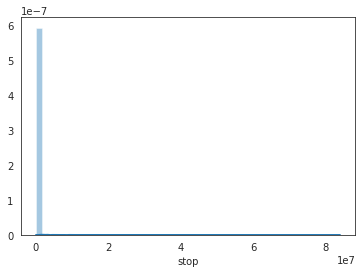

In [12]:
contig_lengths = bg.groupby('contig')['stop'].max()
sns.distplot(contig_lengths)

# Histogram of contig lengths for contigs atleast 10kb
## notice y scale y-axis

In [13]:
# Histogram of contig lengths for contigs atleast 100kb
## notice y scale y-axis

[]

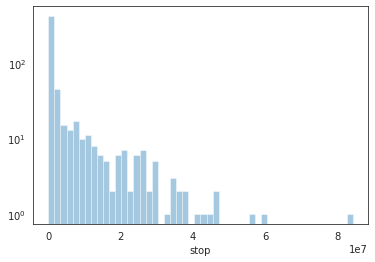

In [15]:
sns.distplot(contig_lengths.loc[contig_lengths>10000], kde = False)
plt.semilogy()

[]

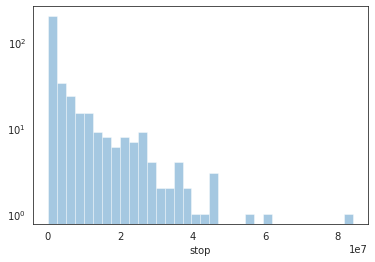

In [16]:
sns.distplot(contig_lengths.loc[contig_lengths>100000], kde = False)
plt.semilogy()

In [13]:
wtavg_func = lambda x: np.average(x['mappability'], weights = x['length'], axis = 0)
wtavg = bg.groupby('contig').apply(wtavg_func)


In [14]:
map_vs_len = pd.concat([contig_lengths, wtavg], axis = 1)
map_vs_len.columns = ['length', 'mappability']

# Plot of mean mappability vs contig length

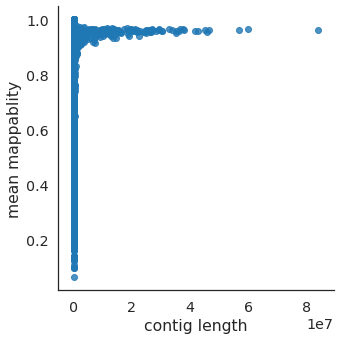

In [19]:
with sns.plotting_context('notebook', font_scale = 1.3):
    sns.lmplot(data = map_vs_len, x ='length', y = 'mappability', fit_reg = False)
    plt.xlabel('contig length')
    plt.ylabel('mean mappablity')


# Plot of mean mappability vs contig length for contigs atleast 10kb

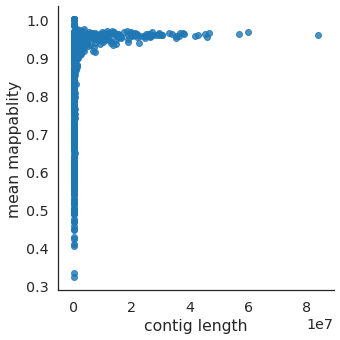

In [20]:
with sns.plotting_context('notebook', font_scale = 1.3):
    sns.lmplot(data = map_vs_len.query('length > 10000'), x ='length', y = 'mappability', fit_reg = False)
    plt.xlabel('contig length')
    plt.ylabel('mean mappablity')

# Plot of mean mappability vs contig length for contigs atleast 100kb

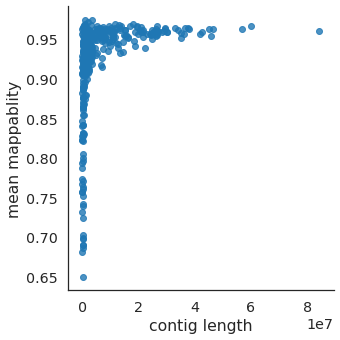

In [21]:
with sns.plotting_context('notebook', font_scale = 1.3):
    sns.lmplot(data = map_vs_len.query('length > 100000'), x ='length', y = 'mappability', fit_reg = False)
    plt.xlabel('contig length')
    plt.ylabel('mean mappablity')

# fraction mappability of 1

In [22]:
len_map1 =bg.query('mappability == 1').groupby('contig')['length'].sum()
frac_map1 = len_map1.div(contig_lengths)
frac_map1 = frac_map1.fillna(0)
frac_map1_vs_len = pd.concat([contig_lengths, frac_map1], axis = 1)
frac_map1_vs_len.columns = ['length', 'frac_map1']

# Plot of fraction of contig above mappablity 1 for contigs atleast 100kb

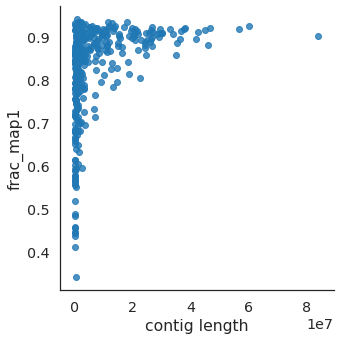

In [26]:
with sns.plotting_context('notebook', font_scale = 1.3):
    sns.lmplot(data = frac_map1_vs_len.query('length > 100000'), x ='length', y = 'frac_map1', fit_reg = False)
    plt.xlabel('contig length')
    plt.ylabel('frac_map1')

In [27]:
results = pd.concat([frac_map1_vs_len, map_vs_len.drop('length', axis = 1)], axis = 1 )
results = results.reset_index()
results.columns = ['contig', 'length', 'frac_map1', 'mean_mappability']
results = results.sort_values('length', ascending = False)
results.to_csv('/home/ryan/leopard/GEM/mappability_K100_E2.summary.txt', 
               index = None, sep ='\t')

In [28]:
!head /home/ryan/leopard/GEM/mappability_K100_E2.summary.txt

contig	length	frac_map1	mean_mappability
NW_017619845.1	84050967	0.9010340237965376	0.9602055059542027
NW_017619846.1	60041034	0.9239992768945319	0.9666545584111373
NW_017619847.1	56672426	0.9160714948041928	0.9630583866243034
NW_017619848.1	46648447	0.9191715428382857	0.9634658363069877
NW_017619849.1	45903527	0.8808122521827135	0.9538238185039395
NW_017619850.1	45016669	0.9144602635970245	0.9626113349885784
NW_017619851.1	42635139	0.9104343250763179	0.9594679842263568
NW_017619852.1	41820504	0.8937019506029865	0.9565472075260816
NW_017619853.1	38035223	0.9185759473527998	0.9628147819508395


In [6]:
!wc -l /home/ryan/leopard/GEM/mappability_K100_E2.summary.txt

50378 /home/ryan/leopard/GEM/mappability_K100_E2.summary.txt


In [9]:
summary = pd.read_csv('/home/ryan/leopard/GEM/mappability_K100_E2.summary.txt', sep = '\t')
summary.query('length>=1e6')

,contig,length,frac_map1,mean_mappability
0,NW_017619845.1,84050967,0.901034,0.960206
1,NW_017619846.1,60041034,0.923999,0.966655
2,NW_017619847.1,56672426,0.916071,0.963058
3,NW_017619848.1,46648447,0.919172,0.963466
4,NW_017619849.1,45903527,0.880812,0.953824
...,...,...,...,...
217,NW_017620062.1,1048471,0.824899,0.910064
218,NW_017620063.1,1039827,0.648665,0.879082
219,NW_017620064.1,1026445,0.922645,0.962875
220,NW_017620065.1,1024999,0.891492,0.951297


In [10]:
summary.query('length>=1e6')['length'].sum()

2491426174

## Write a bedgraph file with the regions of mappability=1 and in scaffolds of length >=1mb


In [15]:
scaffolds_keep = contig_lengths.loc[contig_lengths>=1e6].index.tolist()

In [16]:
contig_lengths.loc[contig_lengths>=1e6].sort_values()

contig
NW_017620066.1     1012239
NW_017620065.1     1024999
NW_017620064.1     1026445
NW_017620063.1     1039827
NW_017620062.1     1048471
                    ...   
NW_017619849.1    45903527
NW_017619848.1    46648447
NW_017619847.1    56672426
NW_017619846.1    60041034
NW_017619845.1    84050967
Name: stop, Length: 222, dtype: int64

In [17]:
bg.query('contig == "NW_017620066.1"')['length'].sum()

981899

In [18]:
bg.query('contig == "NW_017620066.1"')

,contig,start,stop,mappability,length
27828374,NW_017620066.1,0,1636,1.000000,1636
27828375,NW_017620066.1,1636,1639,0.500000,3
27828376,NW_017620066.1,1639,1640,0.333333,1
27828377,NW_017620066.1,1640,1644,0.250000,4
27828378,NW_017620066.1,1644,1647,0.200000,3
...,...,...,...,...,...
27835965,NW_017620066.1,1011914,1011953,0.500000,39
27835966,NW_017620066.1,1011953,1011978,0.333333,25
27835967,NW_017620066.1,1011978,1012014,1.000000,36
27835968,NW_017620066.1,1012014,1012142,0.500000,128


In [19]:
"NW_017620066.1" in scaffolds_keep

True

In [20]:
keep_count = bg.query("contig in @scaffolds_keep")


In [22]:
keep_count['length'].sum()

2385153156

In [26]:
autosomes_file = '/home/casia16/leopard/MeanSDGroup222Scaf_newRemapping.txt'
autosomes = pd.read_csv(autosomes_file, sep = ' ')
autosomes_keep = autosomes.query('MeanBasedGrouping == "autosomes"')['nameScaf'].tolist()
len(autosomes_keep)

186

In [27]:
keep_count_autosomes = bg.query("contig in @autosomes_keep")

keep_count_autosomes['length'].sum()

2249526414

In [34]:
keep_bg = bg.query("mappability == 1").query("contig in @scaffolds_keep")
remove_bg = bg.query("mappability != 1").query("contig in @scaffolds_keep")

In [35]:
remove_bg

,contig,start,stop,mappability,length
1,NW_017619845.1,16030,16031,0.500000,1
2,NW_017619845.1,16031,16033,0.200000,2
3,NW_017619845.1,16033,16034,0.166667,1
4,NW_017619845.1,16034,16035,0.111111,1
5,NW_017619845.1,16035,16036,0.052632,1
...,...,...,...,...,...
27835963,NW_017620066.1,1011873,1011901,0.500000,28
27835964,NW_017620066.1,1011901,1011914,0.333333,13
27835965,NW_017620066.1,1011914,1011953,0.500000,39
27835966,NW_017620066.1,1011953,1011978,0.333333,25


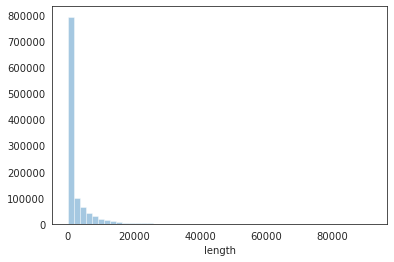

In [36]:
# lots of snort mappably segments
sns.distplot(keep_bg['length'], kde = False)

In [37]:
keep_bg['length'].sum()

2214217472

In [38]:
bg.query("mappability == 1")['length'].sum()

2266015424

In [39]:
keep_bg.head(3)

,contig,start,stop,mappability,length
0,NW_017619845.1,0,16030,1.0,16030
121,NW_017619845.1,16189,16198,1.0,9
123,NW_017619845.1,16200,16283,1.0,83


In [40]:
keep_bg.drop('length', axis = 1).to_csv('/home/ryan/leopard/GEM/mappability_K100_E2.map1_regions.bedgraph', 
                                        header = None, sep ='\t', index = None)

In [41]:
keep_bg.drop(['length', 'mappability'], axis = 1).to_csv('/home/ryan/leopard/GEM/mappability_K100_E2.map1_regions.bed', 
                                        header = None, sep ='\t', index = None)

In [42]:
remove_bg.drop(['length', 'mappability'], axis = 1).to_csv('/home/ryan/leopard/GEM/mappability_K100_E2.REMOVED_regions.bed', 
                                        header = None, sep ='\t', index = None)

In [ ]:
!head /home/ryan/leopard/GEM/mappability_K150_E2.map1_regions.bedgraph

In [ ]:
!head /home/ryan/leopard/GEM/mappability_K150_E2.map1_regions.bed

In [ ]:
!head /home/ryan/leopard/GEM/mappability_K150_E2.bedgraph